In [1]:
%matplotlib inline
import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append('/Users/robin/code/PyAURN')

In [3]:
import importAURN

SOUT = importAURN.importAURN('SOUT', range(2018, 2020))

AURN = SOUT['2019-05-01':'2019-10-01']['PM2.5']

In [4]:
subset = AURN
just_sundays = subset[subset.index.dayofweek == 6].to_frame('Mean')

In [5]:
just_sundays['Special'] = 'Non-Special'
just_sundays.loc['2019-05-05', 'Special'] = 'Marathon'
just_sundays.loc['2019-07-21', 'Special'] = 'Just Ride'

In [6]:
just_sundays['Time'] = just_sundays.index.time
just_sundays['Date'] = just_sundays.index.date

In [7]:
pivoted = just_sundays.pivot(columns='Date', index='Time', values='Mean')

In [8]:
pivoted.index[0]

datetime.time(0, 0)

In [9]:
mean_middle_of_day = pivoted[datetime.time(10, 0):datetime.time(14,0)].mean(axis=0)
mean_middle_of_day.name = 'Mean'

In [10]:
day_ids = just_sundays.pivot(columns='Date', index='Time', values='Special').mode(axis=0).loc[0]

In [11]:
day_ids.name = 'Special'

In [12]:
merged = pd.merge(day_ids, mean_middle_of_day, left_index=True, right_index=True)

In [13]:
merged = merged.sort_values('Mean', ascending=False)

In [29]:
len(merged)

22

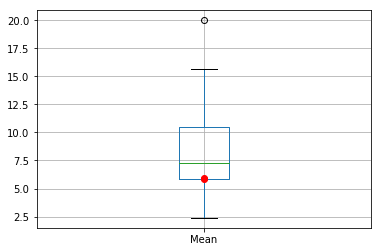

In [27]:
ax = merged.boxplot(column='Mean')
ax.plot(1, 5.90, 'ro')
ax.plot(1, 5.82, 'ro')

In [28]:
merged.to_excel('SundayRankings_AURN.xlsx')